***Package Loading***

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline
from sklearn.metrics import mean_squared_error

***Reading csv data as a pandas dataframe***

In [129]:
data = pd.read_csv("/Users/gauravsharma/Documents/Forecasting/data.csv")

In [130]:
salad_sales = pd.read_csv("/Users/gauravsharma/Documents/Forecasting/salad_data.csv")

In [131]:
data.head(10)

,date,salescount
0,1/2/2016,20
1,1/3/2016,13
2,1/4/2016,32
3,1/5/2016,29
4,1/6/2016,30
5,1/7/2016,35
6,1/8/2016,37
7,1/9/2016,21
8,1/10/2016,16
9,1/11/2016,44


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 2 columns):
date          1116 non-null object
salescount    1116 non-null int64
dtypes: int64(1), object(1)
memory usage: 17.6+ KB


In [133]:
data.count()

date          1116
salescount    1116
dtype: int64

In [134]:
missing_values = data.isna()
missing_values

,date,salescount
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1111,False,False
1112,False,False
1113,False,False
1114,False,False


In [135]:
missing_values.dtypes

date          bool
salescount    bool
dtype: object

In [136]:
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

***Datewise visualization of the data***

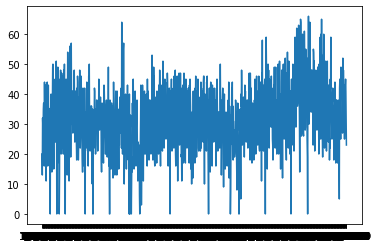

In [137]:
plt.plot(data["date"], data["salescount"])

In [138]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

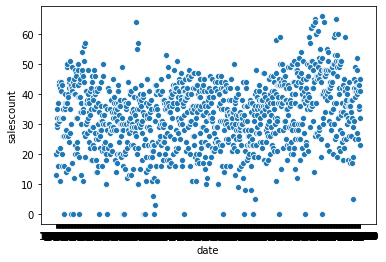

<Figure size 432x288 with 0 Axes>

In [139]:
plt.figure()
sns.scatterplot(x= 'date', y= 'salescount', data = salad_sales)
plt.show()
plt.clf()

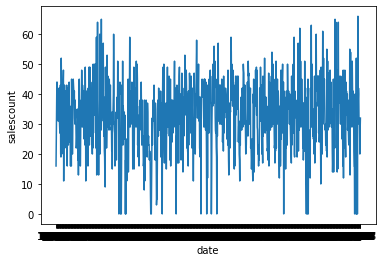

<Figure size 432x288 with 0 Axes>

In [140]:
plt.figure()
sns.lineplot(x= 'date', y= 'salescount', data = salad_sales)
plt.show()
plt.clf()

{'whiskers': [<matplotlib.lines.Line2D at 0x1c2ffcf2e8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c2ffc84e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c2ffcf9e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1c2ffc8b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c2ffc8eb8>],
 'means': []}

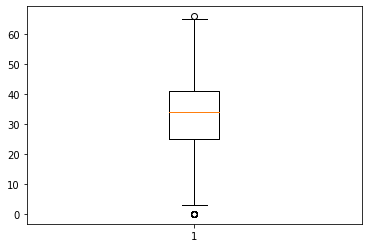

In [141]:
plt.boxplot(data["salescount"])

In [142]:
data["salescount"].mean()

32.82437275985663

(array([ 26.,  26.,  79., 179., 212., 264., 223.,  77.,  18.,  12.]),
 array([ 0. ,  6.6, 13.2, 19.8, 26.4, 33. , 39.6, 46.2, 52.8, 59.4, 66. ]),
 <a list of 10 Patch objects>)

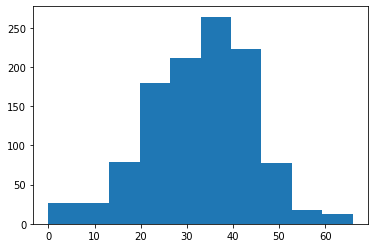

In [143]:
plt.hist(data["salescount"])

In [144]:
data["salescount"].std()

11.492386915054686

(array([  2.,   2.,   1.,   3.,   8.,  14.,  22.,  33.,  42.,  68.,  59.,
         91., 105., 102.,  83.,  96., 102.,  87.,  59.,  49.,  26.,  27.,
         12.,  14.,   3.,   3.,   1.,   1.,   0.,   1.]),
 array([-5.02872678, -2.37140818,  0.28591042,  2.94322902,  5.60054762,
         8.25786622, 10.91518482, 13.57250342, 16.22982202, 18.88714062,
        21.54445922, 24.20177782, 26.85909642, 29.51641502, 32.17373362,
        34.83105222, 37.48837082, 40.14568942, 42.80300802, 45.46032662,
        48.11764522, 50.77496383, 53.43228243, 56.08960103, 58.74691963,
        61.40423823, 64.06155683, 66.71887543, 69.37619403, 72.03351263,
        74.69083123]),
 <a list of 30 Patch objects>)

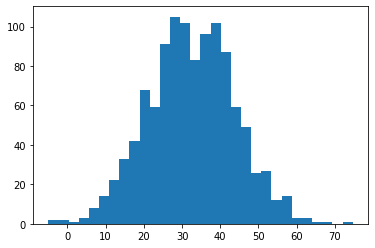

In [145]:
#plt.figure(figsize=(10,10))
a = np.random.normal(32.82, 11.49, 1116)
plt.hist(a,30)

In [146]:
data["date"] = pd.to_datetime(data["date"], infer_datetime_format=True)

In [147]:
index_data = data.set_index(["date"])
index_data.head()

,salescount
date,
2016-01-02,20
2016-01-03,13
2016-01-04,32
2016-01-05,29
2016-01-06,30


***Monthly Visualization of the data***

In [148]:
group_monthwise_mean = salad_sales.groupby(['month'], as_index=False).mean()
group_monthwise_sum = salad_sales.groupby(['month'], as_index=False).sum()
group_monthwise_median = salad_sales.groupby(['month'], as_index=False).median()

In [149]:
group_monthwise_mean[group_monthwise_mean.columns[0:2]]

,month,salescount
0,April,35.200000
1,August,35.580645
2,December,26.318681
3,February,32.882353
4,January,32.603448
5,July,32.150538
6,June,33.222222
7,March,34.731183
8,May,33.161290
9,November,30.483146


In [150]:
group_monthwise_sum[group_monthwise_sum.columns[0:2]]

,month,salescount
0,April,3168
1,August,3309
2,December,2395
3,February,2795
4,January,3782
5,July,2990
6,June,2990
7,March,3230
8,May,3084
9,November,2713


In [151]:
group_monthwise_median[group_monthwise_median.columns[0:2]]

,month,salescount
0,April,37.0
1,August,35.0
2,December,28.0
3,February,35.0
4,January,33.5
5,July,33.0
6,June,33.5
7,March,37.0
8,May,35.0
9,November,32.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

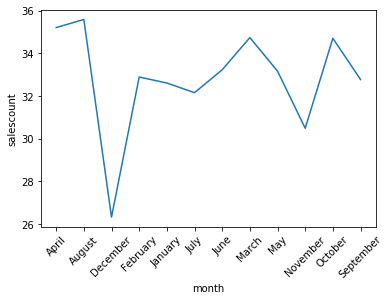

In [152]:
plt.figure()
month_figure_2= sns.lineplot(x= 'month', y= 'salescount', data = group_monthwise_mean, sort= True)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

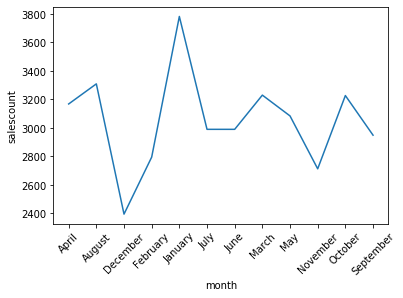

In [153]:
plt.figure()
month_figure_1 = sns.lineplot(x= 'month', y= 'salescount', data = group_monthwise_sum, sort= True)
plt.xticks(rotation=45)

***Weekly Visualization of the data***

In [154]:
group_daywise_mean = salad_sales.groupby(['day'], as_index=False).mean()
group_daywise_sum = salad_sales.groupby(['day'], as_index=False).sum()
group_daywise_median = salad_sales.groupby(['day'], as_index=False).median()
group_daywise_mean[group_daywise_mean.columns[0:2]]

,day,salescount
0,Friday,35.237500
1,Monday,35.664557
2,Saturday,24.950311
3,Sunday,19.425000
4,Thursday,38.886792
5,Tuesday,37.088608
6,Wednesday,38.693750


In [155]:
group_daywise_sum[group_daywise_sum.columns[0:2]]

,day,salescount
0,Friday,5638
1,Monday,5635
2,Saturday,4017
3,Sunday,3108
4,Thursday,6183
5,Tuesday,5860
6,Wednesday,6191


In [156]:
group_daywise_median[group_daywise_median.columns[0:2]]

,day,salescount
0,Friday,35.5
1,Monday,37.0
2,Saturday,25.0
3,Sunday,20.0
4,Thursday,40.0
5,Tuesday,37.0
6,Wednesday,38.0


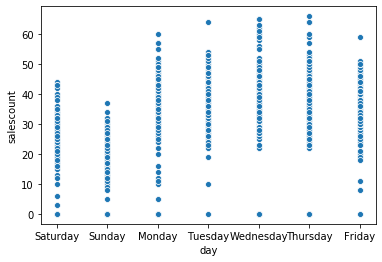

<Figure size 432x288 with 0 Axes>

In [157]:
plt.figure()
sns.scatterplot(x= 'day', y= 'salescount', data = salad_sales)
plt.show()
plt.clf()

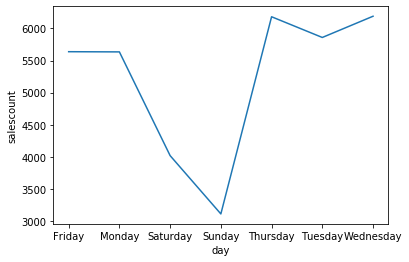

<Figure size 432x288 with 0 Axes>

In [158]:
plt.figure()
sns.lineplot(x= 'day', y= 'salescount', data = group_daywise_sum)
plt.show()
plt.clf()

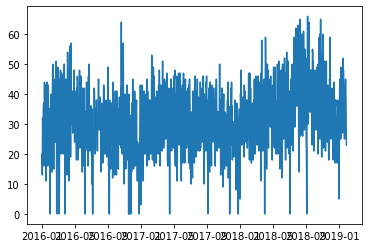

In [159]:
#plt.figure(figsize=(20,20))
plt.plot(index_data)

In [160]:
a = index_data["2016-01"]

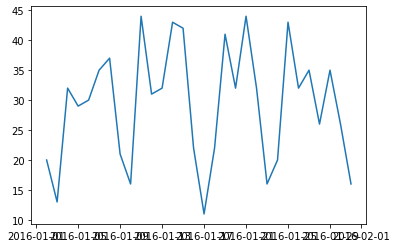

In [191]:
#plt.figure(figsize=(10,10))
plt.plot(a)

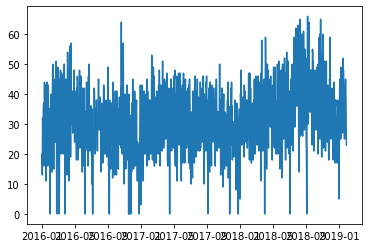

In [162]:
#plt.figure(figsize=(10,10))
plt.plot(index_data)

In [163]:
x = data["salescount"].values

***Augmented Dickey Fuller Test***

In [164]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [165]:
result = adfuller(x)

In [166]:
print("ADF Statistics",result[0])
print("P value", result[1])
print("critical values")
#for key, value in result[4].item():
#print("\t%s, %.3f" % (key,value))
result[4]

ADF Statistics -3.2183217533051844
P value 0.018948339208315956
critical values


{'1%': -3.436336023678866,
 '5%': -2.8641831050780513,
 '10%': -2.568177274243656}

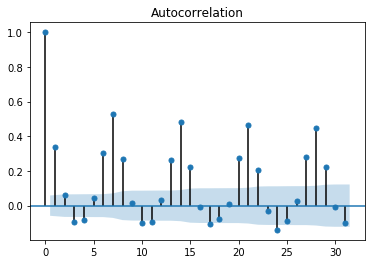

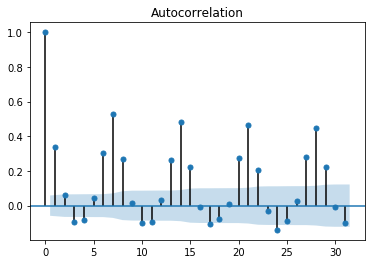

In [167]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(x)

In [168]:
timeseries = index_data["salescount"]

In [169]:
type(timeseries)

pandas.core.series.Series

***Checking pattern period for Mean and Standard Deviations***

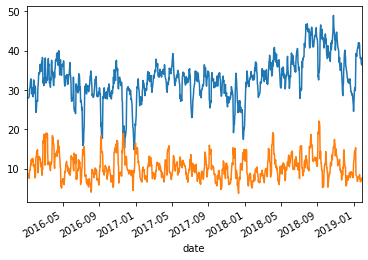

In [190]:
#plt.figure(figsize=(10,10))
timeseries.rolling(7).mean().plot(label= "7 days mean")
timeseries.rolling(7).std().plot(label= "7 days std dev")
#timeseries.plot()

***Seasonal Decomposition***

In [171]:
from statsmodels.tsa.seasonal import seasonal_decompose

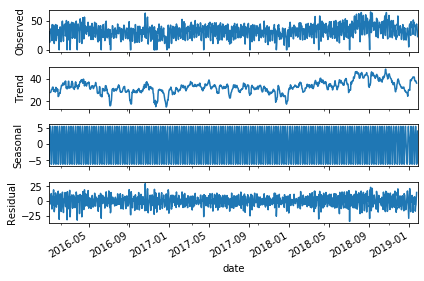

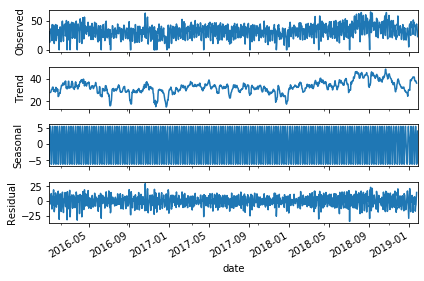

In [172]:
decomp = seasonal_decompose(timeseries, freq= 7)
decomp.plot()

***Auto-Regressive(AR) model fitting and error calculation***

In [173]:
dataset = data["salescount"]
train = dataset[:700]
test = dataset[700:]
prediction = []

In [174]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [175]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()
prediction = model_ar_fit.predict(start=700, end=1116)

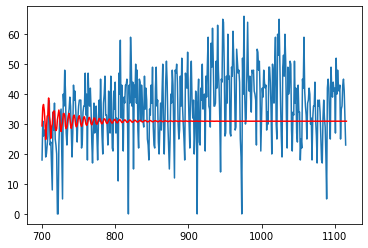

In [189]:
#plt.figure(figsize=(20,20))
plt.plot(test)
plt.plot(prediction, color="red")

***Moving Average Model Fitting and Error Calculation***

In [177]:
mov = pd.DataFrame(data["salescount"])
#mov = train.rolling(7).mean

In [178]:
mov["avg"] = mov.salescount.rolling(7).mean()
mov["avg1"] = mov.salescount.rolling(2).mean()

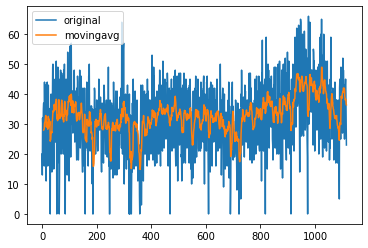

In [188]:
#plt.figure(figsize=(20,20))
plt.plot(mov["salescount"], label='original')
plt.plot(mov["avg"], label='movingavg')
plt.legend(loc=2)

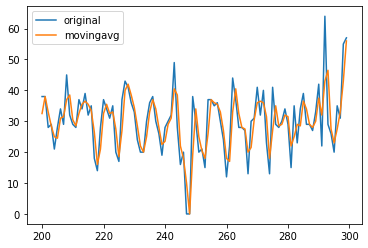

In [187]:
#plt.figure(figsize=(20,20))
plt.plot(mov["salescount"].iloc[200:300], label='original')
plt.plot(mov["avg1"].iloc[200:300], label='movingavg')
plt.legend(loc=2)

In [181]:
residuals = mov["salescount"]-mov["avg1"]

In [182]:
residuals.std()

6.607571956870912

In [183]:
error = mean_squared_error(mov["salescount"].iloc[6:],mov["avg1"].iloc[6:])
#plt.boxplot(residuals)

In [184]:
error

43.71711711711712

***ARIMA Model Building***

In [185]:
x = salad_sales.date
x.to_frame()
y = salad_sales.salescount
y.to_frame()

,salescount
0,20
1,13
2,32
3,29
4,30
...,...
1111,43
1112,45
1113,41
1114,32


In [197]:
from pandas import DataFrame

***ARIMA Implementation along with Residuals Plot and Error Calculation***

In [198]:
model = ARIMA(y, order=(7,0,3))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:             salescount   No. Observations:                 1116
Model:                     ARMA(7, 3)   Log Likelihood               -4070.341
Method:                       css-mle   S.D. of innovations              9.272
Date:                Sat, 01 Feb 2020   AIC                           8164.683
Time:                        10:11:43   BIC                           8224.893
Sample:                             0   HQIC                          8187.445
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               32.8137      0.652     50.329      0.000      31.536      34.092
ar.L1.salescount     0.5971      0.097      6.142      0.000       0.407       0.788
ar.L2.salescount    -0.0497 

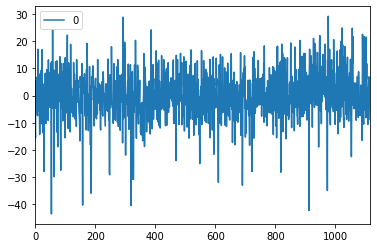

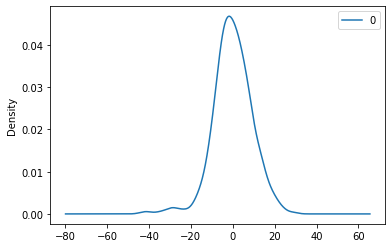

                 0
count  1116.000000
mean      0.005523
std       9.287000
min     -43.504857
25%      -5.406308
50%      -0.190862
75%       5.648134
max      29.131617


In [199]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [200]:
model = ARIMA(y, order=(1,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:             salescount   No. Observations:                 1116
Model:                     ARMA(1, 2)   Log Likelihood               -4214.099
Method:                       css-mle   S.D. of innovations             10.557
Date:                Sat, 01 Feb 2020   AIC                           8438.198
Time:                        10:12:06   BIC                           8463.286
Sample:                             0   HQIC                          8447.682
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               32.8982      1.831     17.969      0.000      29.310      36.487
ar.L1.salescount     0.9932      0.004    224.402      0.000       0.985       1.002
ma.L1.salescount    -0.6986 

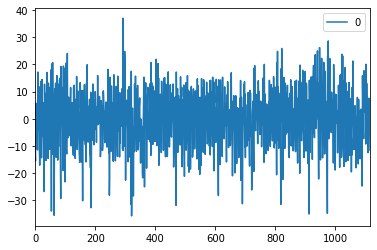

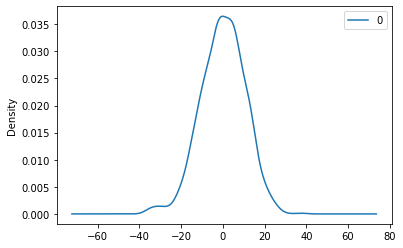

                 0
count  1116.000000
mean      0.073181
std      10.565138
min     -35.887391
25%      -7.012726
50%       0.346700
75%       7.271189
max      37.057783


In [201]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [202]:
model = ARIMA(y, order=(0,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.salescount   No. Observations:                 1115
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -4252.043
Method:                       css-mle   S.D. of innovations             10.951
Date:                Sat, 01 Feb 2020   AIC                           8510.086
Time:                        10:12:41   BIC                           8525.136
Sample:                             1   HQIC                          8515.776
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0059      0.015      0.403      0.687      -0.023       0.035
ma.L1.D.salescount    -0.9562      0.009   -101.454      0.000      -0.975      -0.938
                    

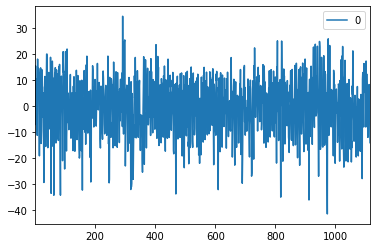

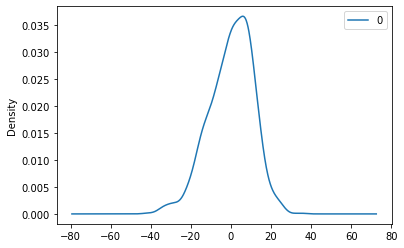

                 0
count  1115.000000
mean      0.061192
std      10.965655
min     -41.370156
25%      -6.934195
50%       1.166921
75%       8.089715
max      34.552239


In [203]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
model = ARIMA(y, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

In [ ]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

***Data Partition as Train-Test Data(66%-34%)***

In [204]:
Y = y.values
size = int(len(Y) * 0.66)
train, test = Y[0:size], Y[size:len(Y)] 

In [205]:
train.shape

(736,)

In [206]:
test.shape

(380,)

In [207]:
history = [m for m in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(7,0,3))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)

/Users/gauravsharma/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/gauravsharma/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/gauravsharma/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/gauravsharma/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/gauravsharma/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_pa

/Users/gauravsharma/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/gauravsharma/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/gauravsharma/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/gauravsharma/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/gauravsharma/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_pa

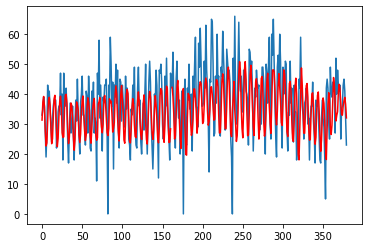

In [208]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [211]:
salescount = data['salescount']

***Grid Search for Parameter Tuning***

In [ ]:
results=[]

#Initiating list for Mean Absolute Percentage Error
MAPE=[]

# Initiating list for AR and MA values for Grid Search
AR_1=[]
MA_1=[]

#Adding the extra column EC
EC = EC.astype('float64')
EC= EC.as_matrix()
salad_salescount = y.astype('float64')

salad_salescount_matrix=salad_salescount.as_matrix()
for a in range(0,2,1):
    for b in range(0,3,1):
        model = ARIMA(salad_salescount_matrix, order=(a,0,b),exog=Add_matrix)
        if a==0 and b==0:
            continue
        model_fit = model.fit(disp=0)
        print("AR_1="+str(a)+" and MA_1= " +str(b))
        print(model_fit.summary().tables[1])
        predicted=model_fit.predict(0,1116)
        true=salescount
        print("For AR="+str(a)+" and MA="+str(b)+" degree MSE of the model is "+str(metrics.mean_squared_error(true,predicted)))
        print("For AR="+str(a)+" and MA="+str(b)+" degree MAE of the model is "+str(metrics.mean_absolute_error(true,predicted)))
        print("For AR="+str(a)+" and MA="+str(b)+" degree RMSE of the model is "+str(np.sqrt(metrics.mean_squared_error(true,predicted))))
        print("For AR="+str(a)+" and MA="+str(b)+" degree MAPE of the model is "+str(np.mean((np.abs((true - predicted)) / true) * 100)))
        plt.plot(predicted-true)
        plt.show()

***Manual Paramter Search for Better Tuning***

In [ ]:
history = [m for m in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)

In [ ]:
history = [m for m in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)

In [ ]:
history = [m for m in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)